# **Data Overview and Quality Testing**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting
import statsmodels # statistical charts
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import pycountry

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# read the csv containing the relevant data

df = pd.read_csv('../input/cost-of-living-index-2022/Cost_of_Living_Index_2022.csv')

In [3]:
# understanding which columns make up df

df.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [4]:
# to get a better understanding of the columns and their data types, we can use df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [5]:
# looking at data in df form

df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


We can see that the data is ranked alphabetically. Let's remove the inital indexing and set the rank as the index for ease of understanding.

In [6]:
# use .set_index() to make a column the index column

df.set_index('Rank')

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rank,,,,,,,
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...
135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41


The pandas method .describe() can give us summary statistics for the columns.

In [7]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


# **EDA**

**Which countries are the most expensive to live in based on the Cost of Living Index?**

In [8]:
top_20_countries = df.sort_values(by = ['Cost of Living Index'],ascending=False).head(20)
top_20_countries

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
15,16,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07
119,120,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44
90,91,Norway,100.90,34.68,69.86,97.31,105.49,83.11
51,52,Iceland,94.86,41.93,70.05,90.22,99.42,77.06
11,12,Barbados,92.37,21.99,59.38,87.81,78.18,32.08
62,63,Jersey,92.02,65.33,79.51,76.88,94.65,79.14
57,58,Israel,88.05,33.94,62.69,76.72,95.31,75.58
32,33,Denmark,84.12,33.23,60.26,68.60,98.75,99.45
8,9,Bahamas,84.00,35.34,61.19,70.59,89.09,45.07
109,110,Singapore,83.98,66.43,75.75,77.08,61.17,91.34


**Which countries are the least expensive to live in based on the Cost of Living Index?**

In [9]:
bot_20_countries = df.sort_values(by = ['Cost of Living Index'],ascending=True).head(20)
bot_20_countries

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
92,93,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
52,53,India,24.43,5.30,15.47,26.43,17.56,49.72
26,27,Colombia,26.72,8.18,18.03,23.47,19.44,28.85
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
66,67,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86
133,134,Uzbekistan,27.31,9.29,18.86,26.83,24.22,22.37
125,126,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83
84,85,Nepal,28.29,3.96,16.89,26.45,20.41,22.96
126,127,Turkey,28.31,6.63,18.15,22.64,18.40,32.88


A simple chart for the most expensive countries based on Cost of Living Index:

Text(0.5, 1.0, 'Top 20 Most expensive countries to live in')

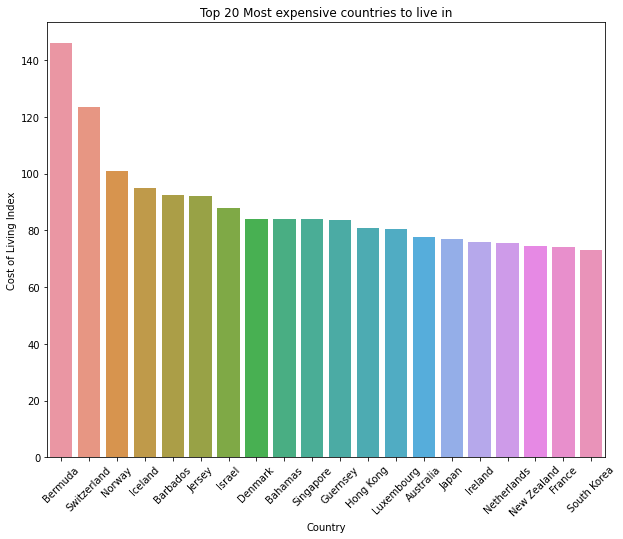

In [10]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_20_countries['Country'], y=top_20_countries['Cost of Living Index'])
plt.xticks(rotation= 45)
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')
plt.title('Top 20 Most expensive countries to live in')

**Which countries are the most expensive to live in based on the Cost of Living Index + Rent?**

Text(0.5, 1.0, 'Top 15 Highest Cost of Living Plus the Cost of Rent by Country')

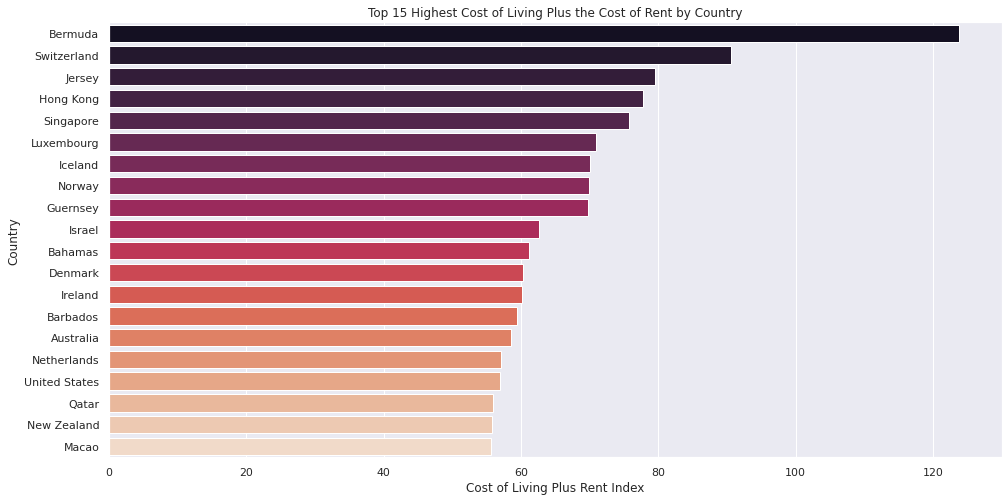

In [11]:
ms_exp_plren_df = df.sort_values(by='Cost of Living Plus Rent Index').tail(20)
sorted_ms_exp_plren_df = ms_exp_plren_df.sort_values(by='Cost of Living Plus Rent Index', ascending=False)

sns.set_theme()
plt.figure(figsize=(16,8))
most_expbar = sns.barplot(x = 'Cost of Living Plus Rent Index', y = 'Country' , data = sorted_ms_exp_plren_df, palette="rocket")

most_expbar.set_title('Top 15 Highest Cost of Living Plus the Cost of Rent by Country')

**Which countries are the least expensive to live in based on the Cost of Living Index + Rent?**

Text(0.5, 1.0, 'Top 15 Least Cost of Living Plus Rent by Country')

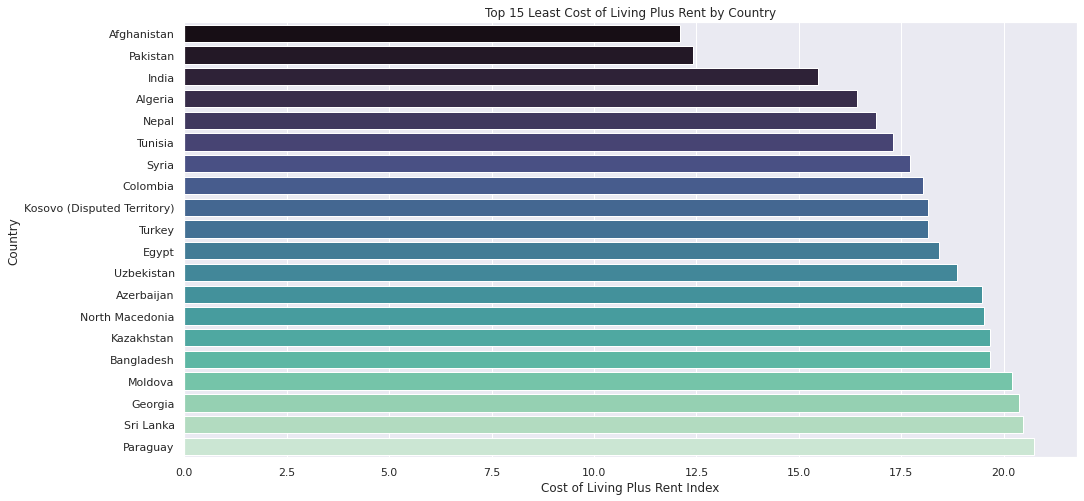

In [12]:
least_exp_plurt_df = df.sort_values(by='Cost of Living Plus Rent Index').head(20)

plt.figure(figsize=(16,8))
least_plurt_expbar = sns.barplot(x = 'Cost of Living Plus Rent Index', y = 'Country' , data = least_exp_plurt_df, palette="mako")

least_plurt_expbar.set_title('Top 15 Least Cost of Living Plus Rent by Country')